<a href="https://colab.research.google.com/github/paneri11/Machine-Learning-Practicals/blob/main/ML_LAB_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
print("Dataset Sample:")
print(df.head())

/tmp/ipython-input-4231548532.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Dataset Sample:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538506  72.598884  71.292296  71.545882  135480400
2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800
2020-01-06  72.405685  72.444328  70.703020  70.954195  118387200
2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200


In [ ]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

In [ ]:
df['Next_Close'] = df['Close'].shift(-1)
df['Trend'] = np.where(df['Next_Close'].values > df['Close'].values, 1, 0)
df.dropna(inplace=True)

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Trend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy, 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.478

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.89      0.61        91
           1       0.60      0.14      0.22       110

    accuracy                           0.48       201
   macro avg       0.53      0.51      0.41       201
weighted avg       0.54      0.48      0.40       201



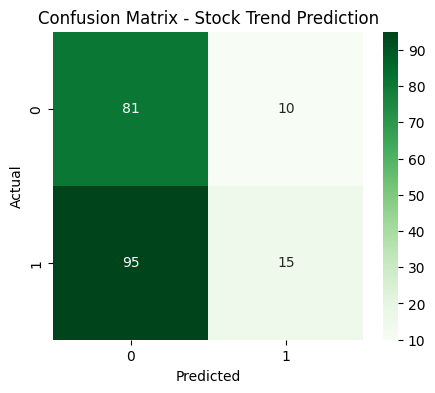

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Stock Trend Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

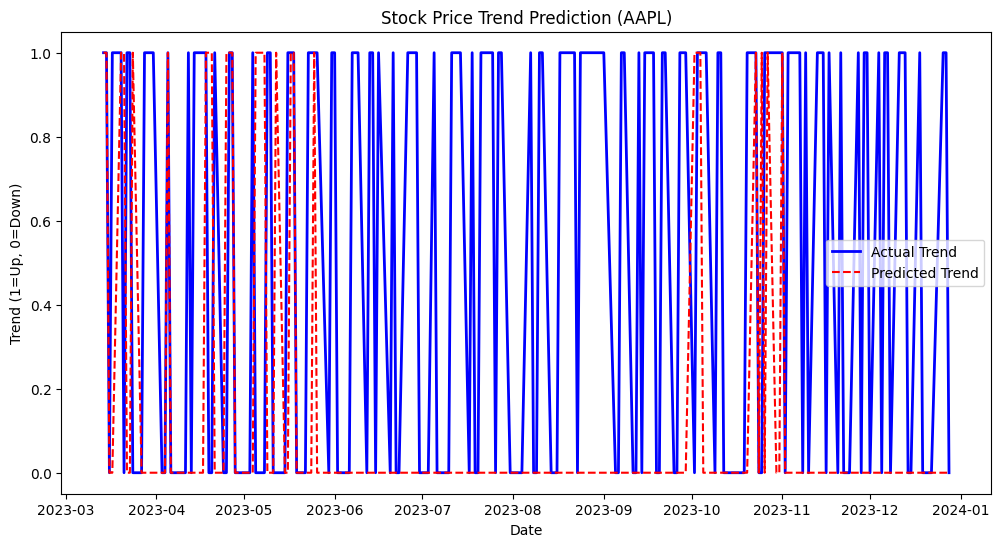

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test.values, label='Actual Trend', color='blue', linewidth=2)
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Trend', color='red', linestyle='--')
plt.title("Stock Price Trend Prediction (AAPL)")
plt.xlabel("Date")
plt.ylabel("Trend (1=Up, 0=Down)")
plt.legend()
plt.show()


Feature Importance:
High      0.210660
Volume    0.209448
Open      0.196924
Close     0.195919
Low       0.187048
dtype: float64


/tmp/ipython-input-154472428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.sort_values(ascending=False), y=importance.sort_values(ascending=False).index, palette="viridis")


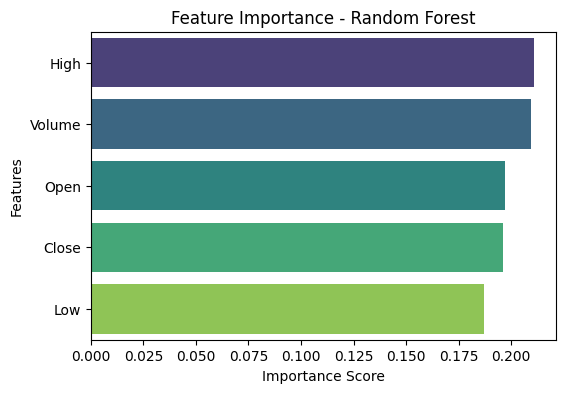

In [ ]:
print("\nFeature Importance:")
importance = pd.Series(model.feature_importances_, index=features)
print(importance.sort_values(ascending=False))

plt.figure(figsize=(6, 4))
sns.barplot(x=importance.sort_values(ascending=False), y=importance.sort_values(ascending=False).index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()